In [1]:
from astropy.io import fits
from astropy.visualization.lupton_rgb import make_lupton_rgb
from matplotlib.image import imsave
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def crops(fnames, xrange, yrange):
    return [fits.open(f)[0].data[xrange[0]:xrange[1], yrange[0]:yrange[1]] for f in fnames]

In [3]:
fr, fg, fb = ['f814w', 'f606w', 'f435w']
fr, fg, fb = ['/data/MSciObjDet/HST/hlsp_frontier_hst_acs-30mas-selfcal_macs0416_{}_v1.0_drz.fits'.format(f)
              for f in [fr, fg, fb]]

fm = '/data/MSciObjDet/HST/sex/t1_1.sex.outseg.fits.gz'

r, g, b, m = crops([fr, fg, fb, fm], (4000, 5001), (4000, 5001))

In [4]:
m = np.where(m > 0, 1.0, 0.0)

In [5]:
img = make_lupton_rgb(r, 1.3*g, 7*b, minimum=-0.01, stretch=0.1, Q=8)

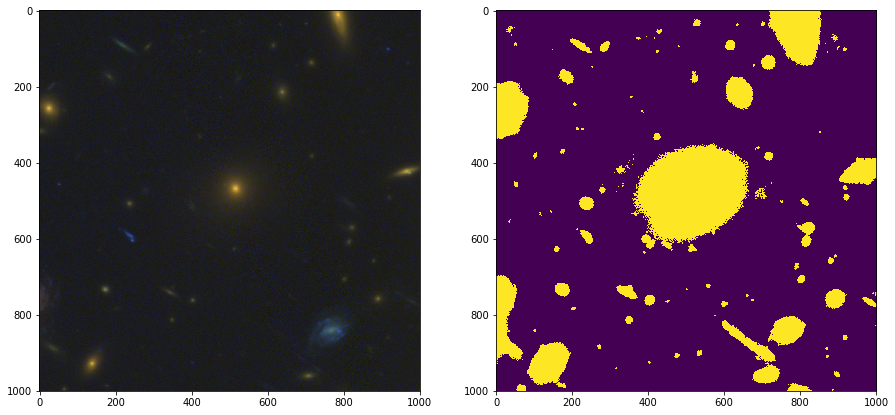

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(img)
ax[1].imshow(m)

In [12]:
def multicrops(fnames, out=''):
    xc, yc = 4700, 4700
    xsize = 5000
    ysize = 5000
    xl = xc - xsize//2
    xh = xc + xsize//2 + 1
    yl = yc - ysize//2
    yh = yc + ysize//2 + 1
    print(xl, xh, yl, yh)
    scales=(1, 1.3, 7.0)
    minimum=-0.01
    stretch=0.1
    Q=8
    cropsize = 256
    xranges = list(zip(np.arange(xl, xh, cropsize)[:-1], np.arange(xl, xh, cropsize)[1:]))
    yranges = list(zip(np.arange(yl, yh, cropsize)[:-1], np.arange(yl, yh, cropsize)[1:]))
    for i, xr in enumerate(xranges):
        for j, yr in enumerate(yranges):
            r, g, b, m = crops(fnames, xr, yr)
            img = make_lupton_rgb(r * scales[0],
                                  g * scales[1],
                                  b * scales[2],
                                  minimum=minimum, stretch=stretch, Q=Q)
            m = np.where(m > 0, 1.0, 0.0)
            np.save('{}crop_{}_{}.npy'.format(out, i, j), img)
            np.save('{}mask_{}_{}.npy'.format(out, i, j), m)

In [13]:
multicrops([fr, fg, fb, fm], out='hst_img/')

2200 7201 2200 7201


In [9]:
def get_hst_img(k, scales=(1, 1.3, 7.0), minimum=-0.01, stretch=0.1, Q=8, cropsize=500):
    fr, fg, fb = ['f814w', 'f606w', 'f435w']
    fr, fg, fb = ['/data/MSciObjDet/HST/hlsp_frontier_hst_acs-30mas-selfcal_macs0416_{}_v1.0_drz.fits'.format(f)
                  for f in [fr, fg, fb]]
    fm = '/data/MSciObjDet/HST/sex/t1_1.sex.outseg.fits.gz'
    xc, yc = 4550, 4850
    xsize = yzsize = 6500
    xl = xc - xsize//2
    xh = xc + xsize//2 + 1
    yl = yc - ysize//2
    yh = yc + ysize//2 + 1
    xranges = list(zip(np.arange(xl, xh, cropsize)[:-1], np.arange(xl, xh, cropsize)[1:]+1))
    yranges = list(zip(np.arange(yl, yh, cropsize)[:-1], np.arange(yl, yh, cropsize)[1:]+1))
    j = k%len(xranges)
    i = k//len(yranges)
    r, g, b, m = crops([fr, fg, fb, fm], xranges[i], yranges[j])
    img = make_lupton_rgb(r * scales[0],
                          g * scales[1],
                          b * scales[2],
                          minimum=minimum, stretch=stretch, Q=Q)
    seg = m #np.where(m > 0, 1.0, 0.0)
    return img, seg

In [17]:
k = 70
img, seg = get_hst_img(k)
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0, 0].imshow(img)
ax[0, 1].imshow(seg)

out='hst_img/'
j = k%len(xranges)
i = k//len(yranges)
img_saved = np.load('{}crop_{}_{}.npy'.format(out, i, j))
mask_saved = np.load('{}mask_{}_{}.npy'.format(out, i, j))
ax[1, 0].imshow(img_saved)
ax[1, 1].imshow(seg_saved)